In [8]:
from importlib import reload
import tools.preprocess as preprocess
import tools.knn as knn

reload(preprocess)
reload(knn)

from tools.preprocess import load_datasets, preprocess_hepatitis_datasets
import pandas as pd


In [9]:
# Load mushroom train and test dataframes

train_dfs = load_datasets('datasetsCBR/hepatitis/hepatitis.fold.*.train.arff')
test_dfs = load_datasets('datasetsCBR/hepatitis/hepatitis.fold.*.test.arff')

train_dfs[0].head()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,Class
0,38.0,b'female',b'no',b'no',b'yes',b'yes',b'yes',b'yes',b'yes',b'no',b'yes',b'yes',b'yes',1.2,118.0,16.0,2.8,NaN,b'yes',b'DIE'
1,54.0,b'female',b'no',b'no',b'yes',b'yes',b'no',b'yes',b'no',b'no',b'no',b'yes',b'no',1.2,85.0,92.0,3.1,66.0,b'yes',b'LIVE'
2,58.0,b'male',b'yes',b'no',b'yes',b'no',b'no',b'yes',b'yes',b'no',b'yes',b'no',b'no',1.4,175.0,55.0,2.7,36.0,b'no',b'LIVE'
3,23.0,b'female',b'yes',b'no',b'no',b'no',b'no',b'?',b'?',b'?',b'?',b'?',b'?',4.6,56.0,16.0,4.6,NaN,b'no',b'LIVE'
4,31.0,b'female',b'yes',b'no',b'no',b'no',b'no',b'yes',b'no',b'no',b'no',b'no',b'no',1.0,85.0,20.0,4.0,100.0,b'no',b'LIVE'


In [10]:
import numpy as np

# Combine the test and train dataframes and replace "?" entries with NaN and sum up all null values
pd.concat(test_dfs + train_dfs).replace(b'?', np.nan).isnull().sum()

# There are missing values, therefore we need to either drop the rows or imputate values

AGE                  0
SEX                  0
STEROID             10
ANTIVIRALS           0
FATIGUE             10
MALAISE             10
ANOREXIA            10
LIVER_BIG          100
LIVER_FIRM         110
SPLEEN_PALPABLE     50
SPIDERS             50
ASCITES             50
VARICES             50
BILIRUBIN           60
ALK_PHOSPHATE      290
SGOT                40
ALBUMIN            160
PROTIME            670
HISTOLOGY            0
Class                0
dtype: int64

In [11]:
# Preprocess the hepatitis train and test dataframes
# For this dataset, we need to convert several columns from categorical to numerical values (via Label Encoding) 
# to ensure all columns are of the same type (numerical). We also need to normalise the numerical columns (via Min-Max Scaling) and
# fill in missing entries in the data (via Simple Imputer)
for df in train_dfs + test_dfs:    
    preprocess_hepatitis_datasets(df)

train_dfs[0]

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,Class
0,0.436620,0,0,0,1,1,1,1,1,0,1,1,1,0.116883,0.342007,0.003155,0.162791,0.607654,1,0
1,0.661972,0,0,0,1,1,0,1,0,0,0,1,0,0.116883,0.219331,0.123028,0.232558,0.660000,1,1
2,0.718310,1,1,0,1,0,0,1,1,0,1,0,0,0.142857,0.553903,0.064669,0.139535,0.360000,0,1
3,0.225352,0,1,0,0,0,0,1,0,0,0,0,0,0.558442,0.111524,0.003155,0.581395,0.607654,0,1
4,0.338028,0,1,0,0,0,0,1,0,0,0,0,0,0.090909,0.219331,0.009464,0.441860,1.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,0.366197,0,0,0,1,1,0,1,0,0,0,1,0,0.051948,0.137546,0.104101,0.209302,0.310000,1,0
137,0.338028,0,1,1,0,0,0,1,0,0,0,0,0,0.051948,0.074349,0.059937,0.441860,0.800000,0,1
138,1.000000,0,1,0,1,0,0,1,0,0,0,0,0,0.051948,0.260223,0.028391,0.441860,0.607654,0,1
139,0.380282,0,1,0,0,0,0,1,0,0,0,0,0,0.077922,0.256506,0.022082,0.441860,0.750000,0,1


In [12]:
# Check if there are any missing values in the dfs
pd.concat(test_dfs + train_dfs).isnull().sum()

# No missing values, therefore simple imputer was successful.

AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER_BIG          0
LIVER_FIRM         0
SPLEEN_PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILIRUBIN          0
ALK_PHOSPHATE      0
SGOT               0
ALBUMIN            0
PROTIME            0
HISTOLOGY          0
Class              0
dtype: int64

Testing combination: k=1, distance_func=ManhattanDistance, voting_func=MajorityClassVote, weights=Equal
Testing combination: k=1, distance_func=ManhattanDistance, voting_func=MajorityClassVote, weights=Custom
Testing combination: k=1, distance_func=ManhattanDistance, voting_func=MajorityClassVote, weights=Custom
Testing combination: k=1, distance_func=ManhattanDistance, voting_func=InverseDistanceWeightedVote, weights=Equal
Testing combination: k=1, distance_func=ManhattanDistance, voting_func=InverseDistanceWeightedVote, weights=Custom
Testing combination: k=1, distance_func=ManhattanDistance, voting_func=InverseDistanceWeightedVote, weights=Custom
Testing combination: k=1, distance_func=ManhattanDistance, voting_func=ShepardsWorkVote, weights=Equal
Testing combination: k=1, distance_func=ManhattanDistance, voting_func=ShepardsWorkVote, weights=Custom
Testing combination: k=1, distance_func=ManhattanDistance, voting_func=ShepardsWorkVote, weights=Custom
Testing combination: k=1, dista

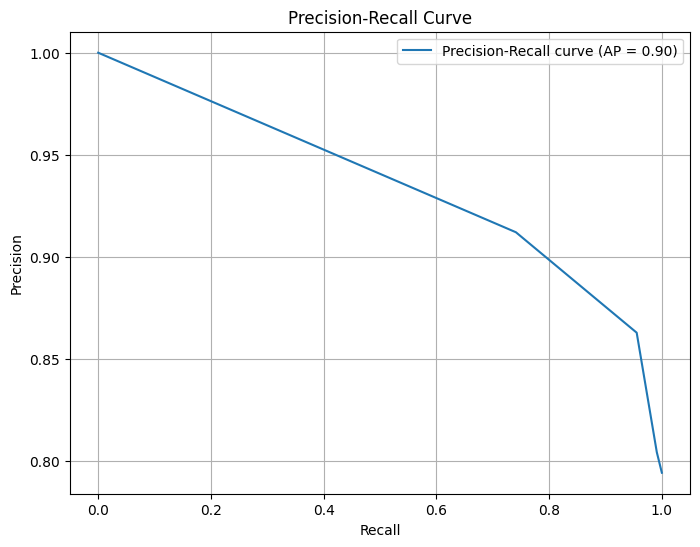

Test Set Accuracy: 0.9286


In [13]:
from tools.knn_utils import prepare_data, calculate_feature_weights, find_best_params, plot_precision_recall_curve, train_and_evaluate_final_model
from tools.distance import EuclideanDistance, ManhattanDistance, MahalanobisDistance
from tools.voting import InverseDistanceWeightedVote, MajorityClassVote, ShepardsWorkVote
from tools.knn import KNNClassifier
import numpy as np

k_values = [1, 3, 5, 7]

# Covariance matrix for Mahalanobis Distance
covariance_matrix = np.cov(train_dfs[0].drop(columns=['Class']).to_numpy(), rowvar=False)

X_train, y_train, X_test, y_test = prepare_data(train_dfs, test_dfs)

normalized_info_gain_weights, normalized_relief_weights = calculate_feature_weights(X_train, y_train)

weights_list = [
    None,  # Equal weight
    normalized_info_gain_weights,  # Information Gain (mutual information)
    normalized_relief_weights  # ReliefF
]

distance_functions = [
    ManhattanDistance(),  
    EuclideanDistance(),
    MahalanobisDistance(covariance_matrix)
]

voting_schemes = [
    MajorityClassVote(),
    InverseDistanceWeightedVote(),
    ShepardsWorkVote()
]

# Track best score and corresponding params that achieved that score
best_score, best_params = find_best_params(X_train, y_train, k_values, distance_functions, voting_schemes, weights_list)

# Print the best combination of parameters
print(f"Best Score: {best_score}")
print(f"Best Params: {best_params}")

knn_final = KNNClassifier(k=best_params['k'],
                          distance_func=distance_functions[0] if best_params['distance_func'] == 'ManhattanDistance' else 
                          distance_functions[1] if best_params['distance_func'] == 'EuclideanDistance' else
                          distance_functions[2],
                          voting_func=voting_schemes[0] if best_params['voting_func'] == 'MajorityClassVote' else 
                          voting_schemes[1] if best_params['voting_func'] == 'InverseDistanceWeightedVote' else
                          voting_schemes[2],
                          weights=weights_list[0] if best_params['weights'] == 'Equal' else weights_list[1] if best_params['weights'] == 'Custom' else weights_list[2])

plot_precision_recall_curve(knn_final, X_train, y_train)

train_and_evaluate_final_model(best_params, distance_functions, voting_schemes, weights_list, X_train, y_train, X_test, y_test)